# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;PREDICT BREAST CANCER

## Assignment

Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images, as described below:

<table>
   <thead>
       <tr>
            <th>Attribute</th>
            <th>Domain</th>
       </tr>
    </thead>
    <tbody>
        <tr>
            <td>1. Sample code number</td>
            <td>id number</td>
        </tr>
        <tr>
            <td>2. Clump Thickness</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>3. Uniformity of Cell Size</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>4. Uniformity of Cell Shape</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>5. Marginal Adhesion</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>6. Single Epithelial Cell Size</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>7. Bare Nuclei</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>8. Bland Chromatin</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>9. Normal Nucleoli</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>10. Mitoses</td>
            <td>1 - 10</td>
        </tr>
        <tr>
            <td>11. Class</td>
            <td>(2 for benign, 4 for malignant)</td>
        </tr>
    </tbody>
</table>

## GETTING THE DATA
The dataset is obtained from:
https://umuzi-org.github.io/tech-department/projects/data-science-specific/logistic-regression/breast-cancer/cancer.data

and saved locally inside a folder called data.

In [1]:
import pandas as pd

data = pd.read_csv('data/cancer.data', header = None)

# Viewing the first five rows of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
# Renaming columns
column_names = {0: "id number", 1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6: "Bare Nuclei", 7: "Bland Chromatin", 8: "Normal Nucleoli", 9: "Mitosesi", 10: "Class"}

# rename data
data = data.rename(columns=column_names)
data.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosesi,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## PREPROCESSING THE DATA

The pre-processing will entail the following:

    Converting object column into integer
    Splitting the data into features and labels
    Transforming the features
    Splitting the data into training and testing data

#### Converting object to integer

In [3]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                      699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitosesi                       699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


The above indicates that there are no missing or non-null values in the data set. The dataset has 11 columns in total, 10 classified as integer variables and 1 object variable, namely "Bare Nuclei". Will convert this object to an integer.

In [4]:
# Getting an idea on the values inside "Bare Nuclei" (well got an error when trying to convert the dtype)
print(data["Bare Nuclei"].unique()) 

# printing the current Bare Nuclei data type
print(data["Bare Nuclei"].dtype)

# converting the data type
data["Bare Nuclei"] = data["Bare Nuclei"].replace("?", 0) 
data["Bare Nuclei"] = data["Bare Nuclei"].astype("int64")


# printing the new Bare Nuclei data type
print(data["Bare Nuclei"].dtype)

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
object
int64


#### Splitting the data into features and labels

In [5]:
# Labels
y = data["Class"]

# Features
X = data.drop("Class", axis=1)

#### Transforming the features

In [6]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and rescale X
scaler = MinMaxScaler(feature_range=(0, 1))
X_transformed = scaler.fit_transform(X)

#### Splitting the data into training and testing data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

# BUILDING A LOGISTIC REGRESSION MODEL

#### Training a model

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Predicting
predict_model = model.predict(X_test)

#### Testing

From the confusion matrix, we can determine the model accuracy as (TP+TN)/(TP+TN+FP+FN) which is the proportion of data that was correctly classified

In [12]:
from sklearn.metrics import confusion_matrix

labels = ['Benign', ' Malignant']

pd.DataFrame(data=confusion_matrix(y_test, predict_model), index=labels, columns=labels)

,Benign,Malignant
Benign,94,1
Malignant,3,42


The rows represent the actual output, while the columns indicate the predicted output. We see that we have classified 94+42=136 cases correctly, and 1+3=4 cases incorrectly.

#### Classification Reports

In [13]:
from sklearn.metrics import classification_report

In [14]:
print('Classification Report')
print(classification_report(y_test, predict_model, target_names=labels))

Classification Report
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        95
   Malignant       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



# Assignment questions

What are the factors that predict malignant cancer?

In [15]:
# Getting pvalues
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X, y)

In [16]:
pd.DataFrame(pvalues,X.columns, columns=["P-values"])

,P-values
id number,0.000000e+00
Clump Thickness,1.112024e-141
Uniformity of Cell Size,1.331337e-303
Uniformity of Cell Shape,2.721677e-282
Marginal Adhesion,4.386839e-216
Single Epithelial Cell Size,6.679245e-110
Bare Nuclei,0.000000e+00
Bland Chromatin,2.605089e-152
Normal Nucleoli,1.950505e-252
Mitosesi,3.069638e-52


According to the above dataframe, only two features (id number and Bare Nuclei) can be considered to significantly predict malignancy (p < 0.05). Assuming id number were randomly assigned, one can exclude it can conclude that only "Bare Nuclei" is a important feature to select for the purpose of training a model.

**Plot a Receiver Operating Characteristic (ROC) curve on the test data.**

Receiver Operating Characteristic tells us how much the model is capable of distinguishing between classes.
Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with cancer and no cancer.

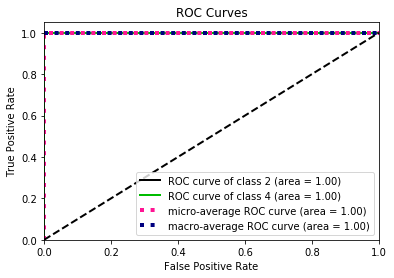

In [17]:
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

y_true = predict_model # ground truth labels
y_probas = model.predict_proba(X_test)# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas)

#### Overdispersion

Overdispersion is the presence of greater variability in a data set than would be expected based on a given statistical model.